<a href="https://colab.research.google.com/github/deen0104/CN6005-2526-T1-Artifical-Intelligence-/blob/main/week3Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [8]:
from google.colab import files
uploaded = files.upload()


Saving titanic (1) (1).csv to titanic (1) (1).csv


In [11]:
import pandas as pd
titanic = pd.read_csv('titanic (1) (1).csv')
titanic.head()


,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,1
4,5,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,0


In [14]:
# Drop columns that aren’t useful for prediction
titanic.drop(['Name', 'Ticket'], axis=1, inplace=True, errors='ignore')

# Fill missing Age values with median
if 'Age' in titanic.columns:
    titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

# If 'Embarked' exists, fill missing values; otherwise ignore it
if 'Embarked' in titanic.columns:
    titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
    titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=True)
else:
    titanic = pd.get_dummies(titanic, columns=['Sex'], drop_first=True)

# Check cleaned data
titanic.head()


,PassengerId,Pclass,Age,Fare,Survived,Sex_male
0,1,3,22.0,7.2500,0,True
1,2,1,38.0,71.2833,1,False
2,3,3,26.0,7.9250,1,False
3,4,1,35.0,53.1000,1,False
4,5,3,35.0,8.0500,0,True


In [15]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


=== Logistic Regression ===
Accuracy: 0.7988826815642458
[[90 15]
 [21 53]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("\n=== KNN Classifier ===")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))



=== KNN Classifier ===
Accuracy: 0.8268156424581006
[[97  8]
 [23 51]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       105
           1       0.86      0.69      0.77        74

    accuracy                           0.83       179
   macro avg       0.84      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



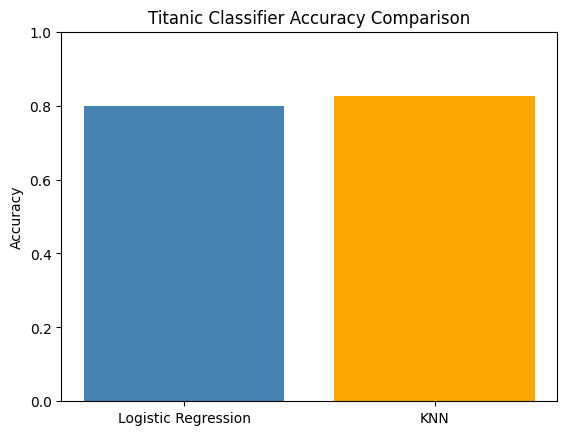

In [20]:
import matplotlib.pyplot as plt

acc_log = accuracy_score(y_test, y_pred_log)
acc_knn = accuracy_score(y_test, y_pred_knn)

plt.bar(['Logistic Regression', 'KNN'], [acc_log, acc_knn], color=['steelblue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Titanic Classifier Accuracy Comparison')
plt.ylim(0, 1)
plt.show()
